<a href="https://colab.research.google.com/github/EsterMariaPaul/Analysis/blob/main/PCA_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [ ]:
#load dataset
file_path = "/content/heart.csv"
df = pd.read_csv(file_path)

#separte target variable
if 'target' in df.columns:
    target = df['target']
    df = df.drop(columns=['target'])
else:
    raise ValueError("Target variable 'target' not found in the dataset.")

In [ ]:
#standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
#split dataset before PCA
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2, random_state=42)

In [ ]:
#baseline classification (before PCA)
start_time = time.time()
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
#compute metrics before PCA
baseline_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "Time Taken": time.time() - start_time
}


In [ ]:
#apply PCA
pca = PCA(n_components=0.95) #keep 95% variance
X_pca= pca.fit_transform(df_scaled)

In [ ]:
#split dataset after PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, target, test_size=0.2, random_state=42)

In [ ]:
#classification after PCA
start_time = time.time()
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

In [ ]:
#compute metrics after PCA
pca_metrics = {
    "Accuracy": accuracy_score(y_test_pca, y_pred_pca),
    "Precision": precision_score(y_test_pca, y_pred_pca),
    "Recall": recall_score(y_test_pca, y_pred_pca),
    "F1-Score": f1_score(y_test_pca, y_pred_pca),
    "Time Taken": time.time() - start_time
}

In [ ]:
#save results to CSV
metrics_df = pd.DataFrame([baseline_metrics, pca_metrics],index=["Baseline","PCA"])
metrics_df.to_csv("classification_metrics.csv", index=False)


PERformance Metrics(Before and After PCA):

          Accuracy  Precision    Recall  F1-Score  Time Taken
Baseline  0.795122   0.756303  0.873786  0.810811   49.069794
PCA       0.800000   0.767241  0.864078  0.812785   82.142009


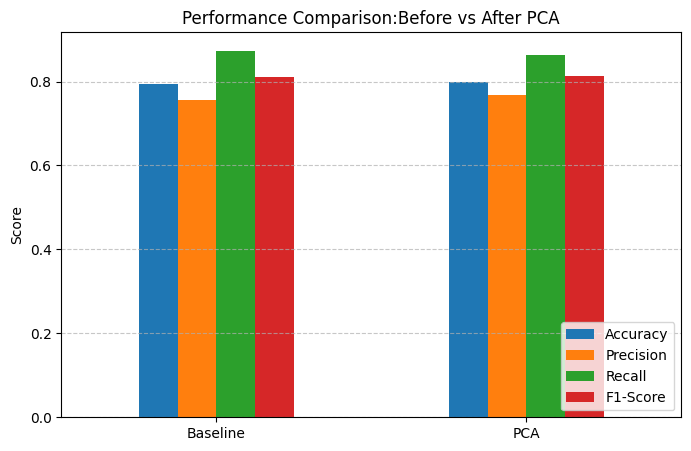

In [ ]:
#print results
print("\nPERformance Metrics(Before and After PCA):\n")
print(metrics_df)

#plot comparison
metrics_df.drop(columns=["Time Taken"]).plot(kind="bar", figsize=(8,5), rot=0)
plt.title("Performance Comparison:Before vs After PCA")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()